In [9]:
import sys
sys.path.append('/../QmeQ/qmeq/')
#sys.path.append('../qmeq/')
import qmeq
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [10]:
#--SETUP: ---------------------------------------------------------------------------------
eLow, eHigh = -6000, 6000
epsilons_L = np.linspace(eLow, eHigh,20)
epsilons_R = np.linspace(eLow, eHigh, 23)
omega = 0.4
u_intra = 2000
u_inter = 1000
V_B = 1000
mu_L = -V_B/2       
mu_R = V_B/2        

gammaL = 0.5
gammaR = gammaL
tL = np.sqrt(gammaL/np.pi/2)
tR = np.sqrt(gammaR/np.pi/2)
T_L = 100
T_R = T_L
n = 4
nleads = 4

U = {(0,1,1,0):u_intra, (2,3,3,2):u_intra, (0,2,2,0):u_inter, (0,3,3,0):u_inter, (1,2,2,1):u_inter, (1,3,3,1):u_inter } 
mulst = {0:mu_L, 1:mu_L, 2:mu_R, 3:mu_R}
tlst = {0:T_L, 1:T_L, 2:T_R, 3:T_R}

In [11]:
#Från series till parallel!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
I = np.zeros((len(epsilons_L),len(epsilons_R)))
Prob = np.zeros((n+1, len(epsilons_L), len(epsilons_R)))

#system = qmeq.Builder(nsingle=n, coulomb=U, nleads=nleads,
#                        mulst=mulst, tlst=tlst, tleads={(0, 0):tL, (1, 1):tL, (2, 2):tR, (3, 3):tR}, dband=1e4, countingleads=[0,1], kerntype='pyLindblad')


for L_idx, eL in enumerate(epsilons_L):
    for R_idx, eR in enumerate(epsilons_R):
        system = qmeq.Builder(nsingle=n, hsingle={(0,0):eL, (1,1):eL, (2,2):eR, (3,3):eR, (0,2):omega, (1,3):omega}, coulomb=U, nleads=nleads,
                        mulst=mulst, tlst=tlst, tleads={(0, 0):tL, (1, 1):tL, (2, 2):tR, (3, 3):tR}, dband=1e4, countingleads=[0,1], kerntype='pyLindblad')
        #system.change(hsingle={(0,0):eL, (1,1):eL, (2,2):eR, (3,3):eR, (0,2):omega, (1,3):omega})
        system.solve()
        I[L_idx, R_idx] = system.current_noise[0]
        rho = system.phi0
        Prob[0, L_idx, R_idx] = rho[0] 
        Prob[1, L_idx, R_idx] = rho[1] + rho[2] + rho[3] + rho[4]
        for k in range(6):
            Prob[2, L_idx, R_idx] += rho[5+k]
        Prob[3, L_idx, R_idx] = rho[11] + rho[12] + rho[13] + rho[14]
        Prob[4, L_idx, R_idx] = rho[15]


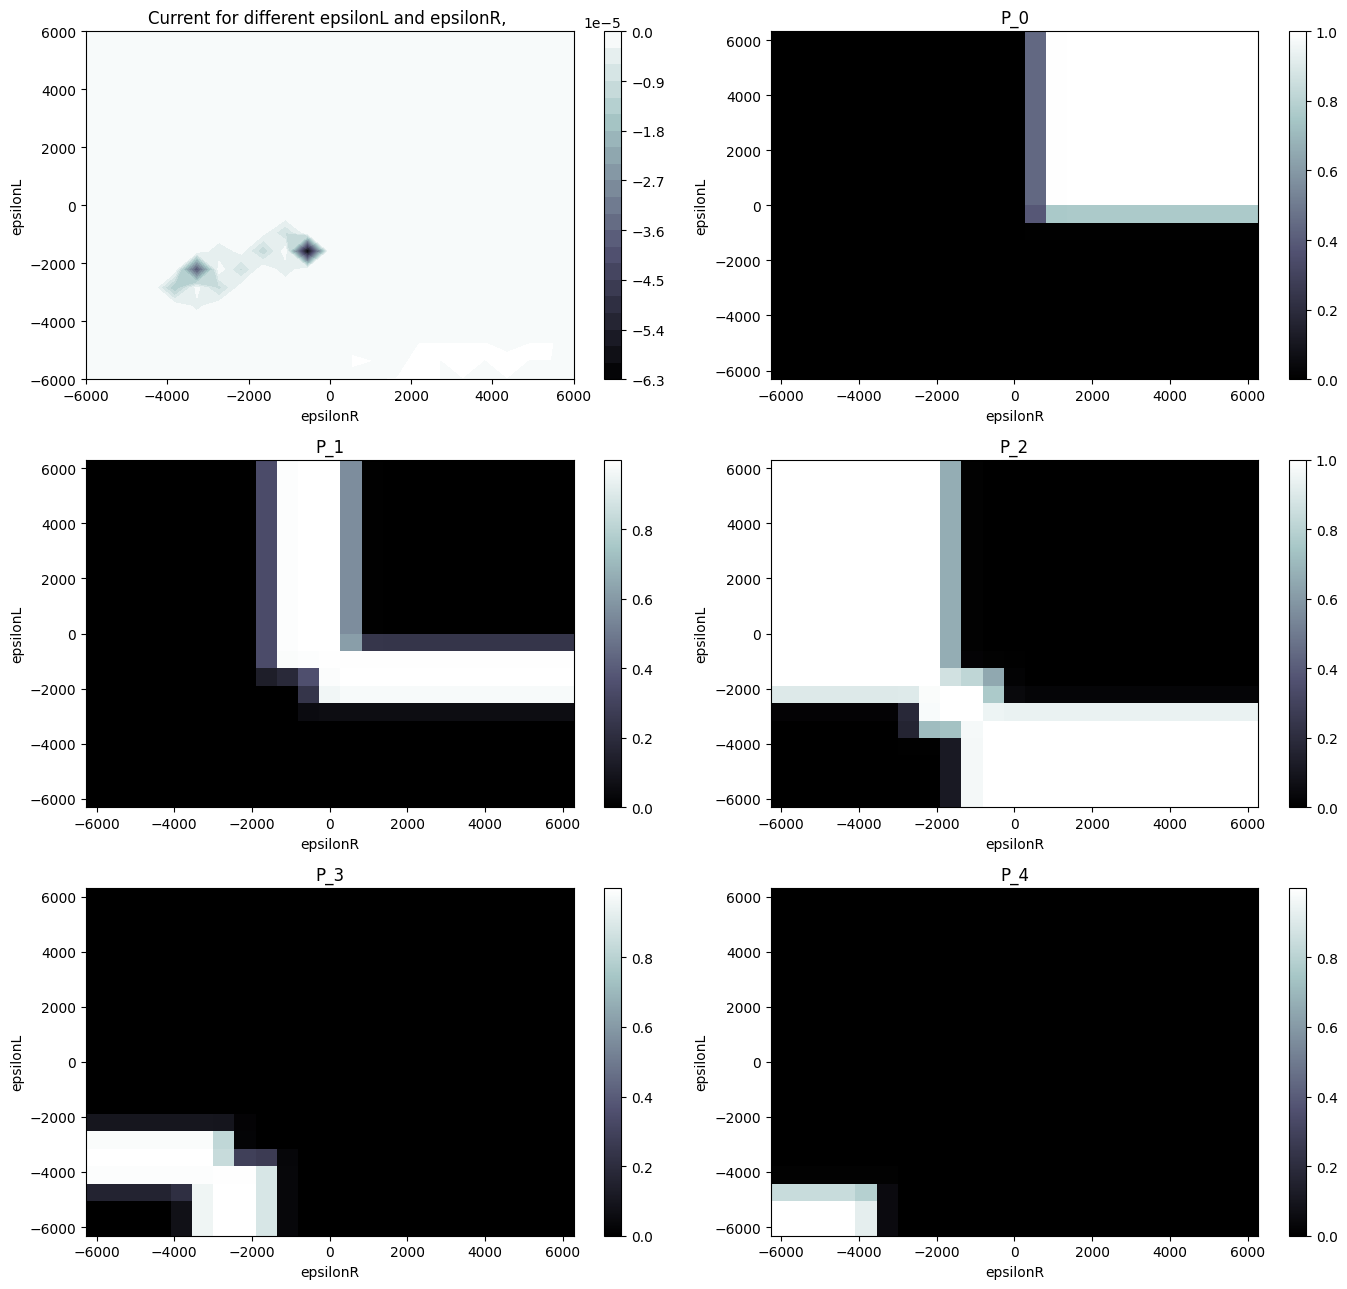

"\nplt.figure(figsize=(8, 6))\ncontour = plt.contourf(epsilonL, epsilonR, I, 20, cmap='binary')  # Adjust number of contour levels as needed\nplt.colorbar(contour)\nplt.xlabel('epsilonL')\nplt.ylabel('epsilonR')\nplt.title('Current for different epsilonL and epsilonR, ')\nplt.show()\n"

In [12]:
# Create a mesh grid
eps_R_mesh, eps_L_mesh = np.meshgrid(epsilons_R, epsilons_L)

fig, axes = plt.subplots(3, 2, figsize=(14, 13)) 

contour = axes[0,0].contourf(eps_R_mesh, eps_L_mesh, I, 20, cmap='bone')  # Adjust number of contour levels as needed
fig.colorbar(contour, ax=axes[0,0])
axes[0,0].set_xlabel('epsilonR')
axes[0,0].set_ylabel('epsilonL')
axes[0,0].set_title('Current for different epsilonL and epsilonR, ')

contour = axes[0,1].pcolormesh(eps_R_mesh, eps_L_mesh, Prob[0], shading='auto', cmap='bone')
fig.colorbar(contour, ax=axes[0,1])
axes[0,1].set_title('P_0')
axes[0,1].set_xlabel('epsilonR')
axes[0,1].set_ylabel('epsilonL')

contour = axes[1,0].pcolormesh(eps_R_mesh, eps_L_mesh, Prob[1], shading='auto', cmap='bone')
fig.colorbar(contour, ax=axes[1,0])
axes[1,0].set_xlabel('epsilonR')
axes[1,0].set_ylabel('epsilonL')
axes[1,0].set_title('P_1')

contour = axes[1,1].pcolormesh(eps_R_mesh, eps_L_mesh, Prob[2], shading='auto', cmap='bone')
fig.colorbar(contour, ax=axes[1,1])
axes[1,1].set_title('P_2')
axes[1,1].set_xlabel('epsilonR')
axes[1,1].set_ylabel('epsilonL')

contour = axes[2,0].pcolormesh(eps_R_mesh, eps_L_mesh, Prob[3], shading='auto', cmap='bone')
fig.colorbar(contour, ax=axes[2,0])
axes[2,0].set_xlabel('epsilonR')
axes[2,0].set_ylabel('epsilonL')
axes[2,0].set_title('P_3')

contour = axes[2,1].pcolormesh(eps_R_mesh, eps_L_mesh, Prob[4], shading='auto', cmap='bone')
fig.colorbar(contour, ax=axes[2,1])
axes[2,1].set_title('P_4')
axes[2,1].set_xlabel('epsilonR')
axes[2,1].set_ylabel('epsilonL')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


'''
plt.figure(figsize=(8, 6))
contour = plt.contourf(epsilonL, epsilonR, I, 20, cmap='binary')  # Adjust number of contour levels as needed
plt.colorbar(contour)
plt.xlabel('epsilonL')
plt.ylabel('epsilonR')
plt.title('Current for different epsilonL and epsilonR, ')
plt.show()
'''

In [20]:
#COLOUMB DIAMONDS
V_B = np.linspace(-10000,10000, 100)
epsilons = np.linspace(-6000, 6000, 10)


omega = 1000

I = np.zeros((len(V_B),len(epsilons)))


for e_idx, eps in enumerate(epsilons):
    for v_idx, vb in enumerate(V_B):
        system = qmeq.Builder(nsingle=n, hsingle={(0,0):eps, (1,1):eps, (2,2):eps, (3,3):eps, (0,2):omega, (1,3):omega}, coulomb=U, nleads=nleads,
                        mulst={0:-vb/2, 1:-vb/2, 2:vb/2, 3:vb/2}, tlst=tlst, tleads={(0, 0):tL, (1, 1):tL, (2, 2):tR, (3, 3):tR}, dband=1e4, countingleads=[0,1], kerntype='pyLindblad')

        system.solve()
        I[v_idx, e_idx] = system.current_noise[0]
        I[v_idx, e_idx] = system.current[0]+system.current[1]



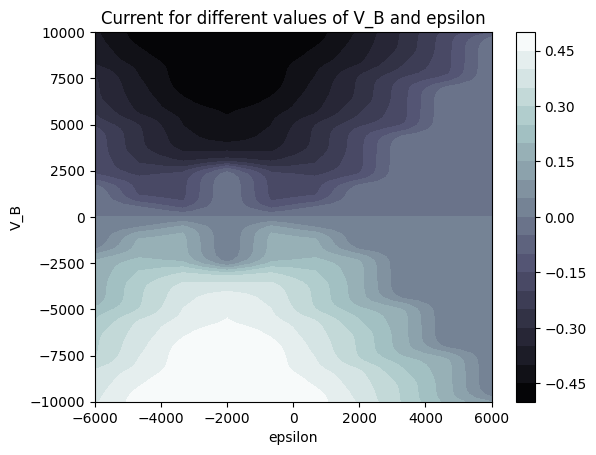

In [22]:
eps_mesh, V_B_mesh = np.meshgrid(epsilons, V_B)

contour = plt.contourf(eps_mesh, V_B_mesh, I, 20, cmap='bone')
plt.colorbar(contour)
plt.xlabel('epsilon')
plt.ylabel('V_B')
plt.title('Current for different values of V_B and epsilon')
plt.show()